<a href="https://colab.research.google.com/github/Abhiram03-2009/Abhi.github.io/blob/main/gene_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the biopython library
Biopython is a collection of tools and libraries for computational biology and bioinformatics. It provides functionality to work with biological data in Python.

Biopython simplifies complex biological computations, enabling researchers and students to perform bioinformatics tasks efficiently using Python.

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 15.2 MB/s eta 0:00:00



### Bio and SeqIO

#### Bio
The `Bio` module is a core component of Biopython, a comprehensive library for computational biology. It contains various submodules and tools designed to handle a wide range of biological data and analyses.

#### SeqIO
The `SeqIO` submodule within Biopython is specifically used for reading and writing sequence data in different formats. It provides a straightforward interface to parse sequence files (such as FASTA, GenBank, etc.) and to output sequences in these formats.

#### Key Uses of SeqIO
- **Reading Sequences**: Easily read sequences from files and handle them as Python objects.
- **Writing Sequences**: Write sequence data to files in various formats.
- **Format Conversion**: Convert sequence data between different file formats.
- **Iterating Over Sequences**: Efficiently process large sequence datasets by iterating through sequences in a file.


In [ ]:
from Bio import SeqIO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
human_dna = pd.read_table('/content/human_data.txt')
human_dna.head()


,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


# K-mers Function and Application to DNA Sequences

This markdown file explains the code used to generate k-mers from DNA sequences and apply it to a dataset of human DNA sequences.

### K-mers Function

The `Kmers_funct` function generates k-mers from a given nucleotide sequence. A k-mer is a substring of length `k` from a sequence, which is useful for various bioinformatics analyses.

###Step 1: Generate K-mers for Each Sequence:

The apply method is used to apply the Kmers_funct function to each row in the human_dna DataFrame.
The lambda function passes the sequence from each row to the Kmers_funct function, generating k-mers of length 3.
The resulting list of k-mers is stored in a new column named words.

###Step 2: Drop the Original Sequence Column:

The drop method is used to remove the original sequence column from the human_dna DataFrame, as it has been converted into k-mers.

In [ ]:
def Kmers_funct(seq, size=3):
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence'], size=3), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

In [ ]:
human_dna.head()

,class,words
0,4,"[atg, tgc, gcc, ccc, ccc, cca, caa, aac, act, ..."
1,4,"[atg, tga, gaa, aac, acg, cga, gaa, aaa, aaa, ..."
2,3,"[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ..."
3,3,"[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ..."
4,3,"[atg, tgc, gca, caa, aac, aca, cag, agc, gca, ..."


# Converting K-mers to Text and Extracting Labels from DNA Data

This markdown file explains the code used to convert lists of k-mers into text strings and extract labels from a dataset of human DNA sequences.

### Converting K-mers to Text Strings

The following code converts lists of k-mers into space-separated text strings, making them suitable for text-based analysis and machine learning models.

### Step 1: Convert Column to List:

The human_texts variable is created by converting the words column of the human_dna DataFrame into a list of lists.
Each element in human_texts is a list of k-mers for a DNA sequence.
### Step 2: Join K-mers into Strings:

The for loop iterates over each list of k-mers in human_texts.
The join method concatenates the k-mers into a single string, with each k-mer separated by a space.
This transformation converts each list of k-mers into a space-separated text string.

### Extract Labels:
The iloc method is used to select the first column (assumed to be the label column) from the human_dna DataFrame.
The values attribute converts the selected column into a numpy array.
The resulting array is stored in the y_human variable, containing the labels for each sequence.

In [ ]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

# Vectorizing Text Data Using CountVectorizer with N-grams

### Step 1

The code begins by importing the `CountVectorizer` class from the `sklearn.feature_extraction.text` module. This class is essential for converting a collection of text documents into a matrix of token counts. Next, an instance of `CountVectorizer` is created with the parameter `ngram_range=(4,4)`. This parameter specifies that the vectorizer should consider 4-grams (sequences of four consecutive characters) when tokenizing the text.

### Step 2
Following the initialization, the `fit_transform` method of `CountVectorizer` is called with `human_texts` as input. This method performs two main operations: fitting and transforming. During the fitting process, the vectorizer learns the vocabulary dictionary of all 4-grams present in the input text. During the transforming process, the input text is converted into a matrix where each row corresponds to a document and each column corresponds to a 4-gram from the vocabulary. The values in the matrix represent the count of each 4-gram in the respective document.

### Step 3
The resulting matrix `X` is a sparse matrix where each row represents a document (DNA sequence) and each column represents a 4-gram, with the values indicating the frequency of each 4-gram. For example, if `human_texts` is a list of space-separated text strings generated from DNA sequences, such as `['agc gct ctt tta tag agc gct cta', 'tcg cga gat atc tcg cga']`, the vocabulary might include 4-grams like 'agcg', 'gctc', 'ctct', etc. The resulting count matrix `X` will show the frequency of each 4-gram in the input text documents.

### Summary
This code snippet demonstrates how to use `CountVectorizer` with a specified n-gram range to transform DNA sequence data into a numerical format suitable for machine learning models. By considering 4-grams, the vectorizer captures sequences of four consecutive characters, which can provide more detailed information for downstream analysis. The choice of n-gram size (4 in this case) is based on previous testing and may vary depending on the specific requirements of your analysis.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)

In [ ]:
dense_matrix = X.toarray()

In [ ]:
dense_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [4, 2, 2, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Split the dataset into train and test.
#### Why are we doing this?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_human,
                                                   test_size = 0.20,
                                                   random_state=42)

In [ ]:
# import the library of the algorithm
from sklearn.neighbors import KNeighborsClassifier

# Initialize hyperparams
n_neighbors = 5

# Initialize the algorithm
classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
algorithm = 'KNeighborsClassifier'
# Train the algorithm
classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Make predictions on unseen data

In [ ]:
y_pred = classifier.predict(X_test)

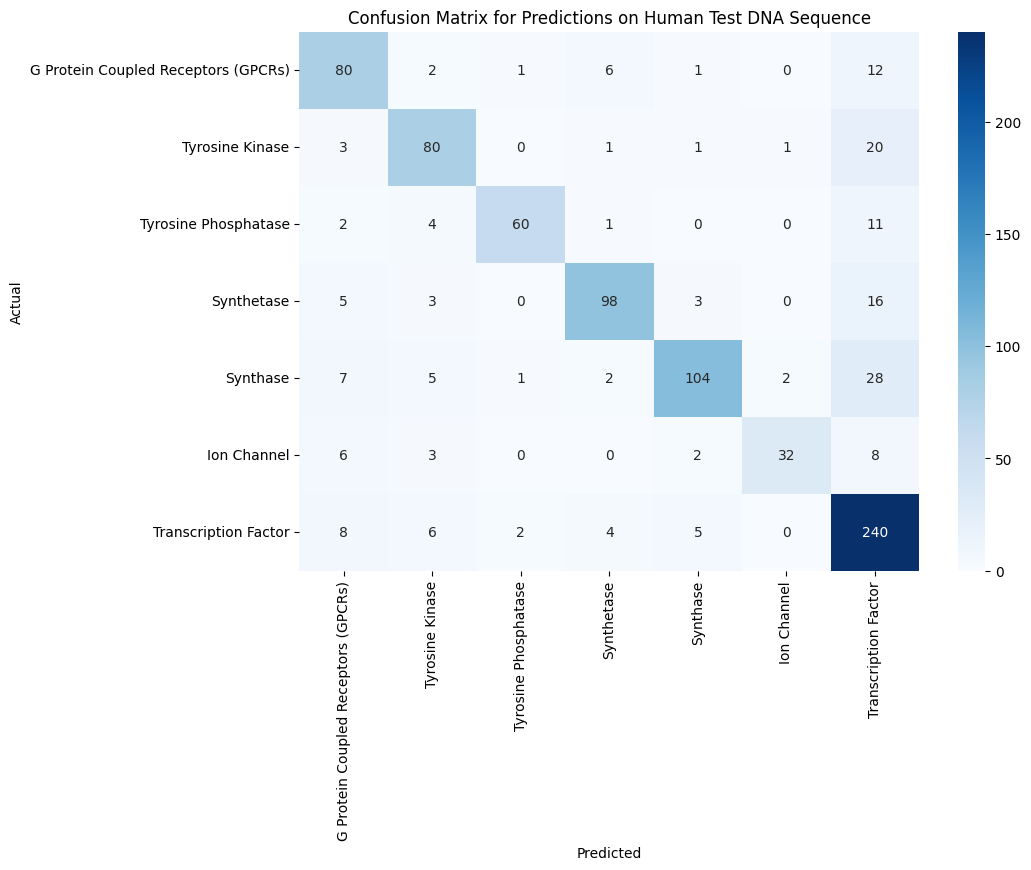

Metrics for Predictions on Human Test DNA Sequence


,Metric,Score
0,Accuracy,0.792
1,Precision,0.809
2,Recall,0.792
3,F1 Score,0.792


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Category labels
categories = [
    "G Protein Coupled Receptors (GPCRs)",
    "Tyrosine Kinase",
    "Tyrosine Phosphatase",
    "Synthetase",
    "Synthase",
    "Ion Channel",
    "Transcription Factor"
]

# Function to display the confusion matrix
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=categories, columns=categories)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix for Predictions on Human Test DNA Sequence")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Function to calculate and display metrics
def display_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    print("Metrics for Predictions on Human Test DNA Sequence")
    display(metrics_df.style.format({'Score': '{:.3f}'}).background_gradient(cmap='Blues'))


display_confusion_matrix(y_test, y_pred)
display_metrics(y_test, y_pred)